In [28]:
import pandas as pd

df = pd.read_csv('LinearRegressionData.csv')
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [29]:
df.shape

(20, 2)

In [30]:
X = df[['hour']]
y = df[['score']]

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [32]:
y_pred = reg.predict(X)
y_pred

array([[  5.00336377],
       [ 12.31395163],
       [ 18.58016979],
       [ 24.84638795],
       [ 26.93512734],
       [ 33.20134551],
       [ 40.51193337],
       [ 45.73378184],
       [ 46.77815153],
       [ 52.        ],
       [ 55.13310908],
       [ 60.35495755],
       [ 62.44369694],
       [ 63.48806663],
       [ 64.53243633],
       [ 71.84302419],
       [ 74.97613327],
       [ 87.5085696 ],
       [ 89.59730899],
       [104.2184847 ]])

In [33]:
reg.coef_, reg.intercept_

(array([[10.44369694]]), array([-0.2184847]))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [35]:
X_train, len(X_train)

(    hour
 10   5.3
 17   8.4
 6    3.9
 13   6.1
 4    2.6
 2    1.8
 5    3.2
 14   6.2
 9    5.0
 7    4.4
 16   7.2
 11   5.8
 3    2.4
 0    0.5
 15   6.9
 12   6.0,
 16)

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
reg.score(X_test, y_test)

0.9727616474310156

In [38]:
reg.score(X_train, y_train)

0.9356663661221668

In [39]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=300, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=300, random_state=0, verbose=1)

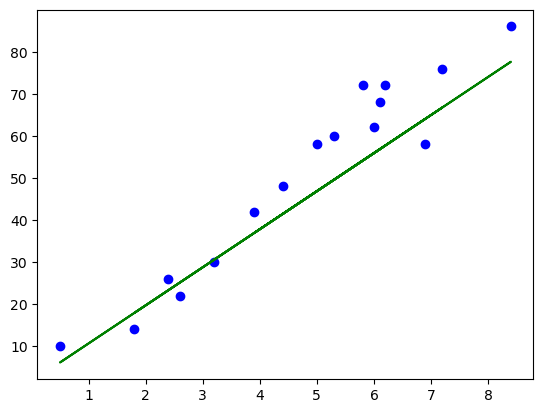

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.show()

In [41]:
sr.coef_, sr.intercept_

(array([9.05069563]), array([1.59210372]))

In [42]:
sr.score(X_train, y_train)

0.8528075925731422

In [43]:
sr.score(X_test, y_test)

0.9625821079434302

In [44]:
y_pred = sr.predict(X_test)

In [46]:
from sklearn.metrics import (mean_absolute_error,
                            mean_squared_error,
                            r2_score)
print(f'mae : {mean_absolute_error(y_test, y_pred)}')
print(f'mse : {mean_squared_error(y_test, y_pred)}')
# print(f'mse : {mean_squared_error(y_test, y_pred,squared=False)}')
print(f'r2_score : {r2_score(y_test, y_pred)}')

mae : 6.811506590629531
mse : 53.1708246123856
r2_score : 0.9625821079434302


In [72]:
df = pd.read_csv('MultipleLinearRegressionData.csv')
df

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22
5,3.2,0,Home,30
6,3.9,0,Library,42
7,4.4,0,Library,48
8,4.5,5,Home,38
9,5.0,1,Cafe,58


In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'),[2])],
    remainder = 'passthrough')
X = ct.fit_transform(df)

In [73]:
X

array([[  1. ,   0. ,   0.5,   3. ,  10. ],
       [  0. ,   1. ,   1.2,   4. ,   8. ],
       [  0. ,   0. ,   1.8,   2. ,  14. ],
       [  0. ,   0. ,   2.4,   0. ,  26. ],
       [  1. ,   0. ,   2.6,   2. ,  22. ],
       [  1. ,   0. ,   3.2,   0. ,  30. ],
       [  0. ,   1. ,   3.9,   0. ,  42. ],
       [  0. ,   1. ,   4.4,   0. ,  48. ],
       [  1. ,   0. ,   4.5,   5. ,  38. ],
       [  0. ,   0. ,   5. ,   1. ,  58. ],
       [  0. ,   0. ,   5.3,   2. ,  60. ],
       [  0. ,   0. ,   5.8,   0. ,  72. ],
       [  0. ,   1. ,   6. ,   3. ,  62. ],
       [  0. ,   0. ,   6.1,   1. ,  68. ],
       [  0. ,   1. ,   6.2,   1. ,  72. ],
       [  1. ,   0. ,   6.9,   4. ,  58. ],
       [  0. ,   0. ,   7.2,   2. ,  76. ],
       [  1. ,   0. ,   8.4,   1. ,  86. ],
       [  0. ,   1. ,   8.6,   1. ,  90. ],
       [  0. ,   1. ,  10. ,   0. , 100. ]])